In [1]:
import pandas as pd
from pathlib import Path
from omegaconf import OmegaConf
import numpy as np

ground_truth_csv = Path(
    "/teamspace/studios/this_studio/lightning-pose/data/betta/CollectedData_new.csv"
)

base_dir = Path("/teamspace/studios/this_studio/lightning-pose/outputs/betta_ood_preds/")

model_names = [
    "model_sup_1",
    "model_sup_2",
    "model_unsup_1",
    "model_unsup_2",
    #"model_unsup_1_median",
    #"model_unsup_2_median",
    "model_unsup_1_mean",
    "model_unsup_2_mean",
]

pred_csv_paths = [
    base_dir / model_name / "predictions_new.csv" for model_name in model_names
]
error_csv_paths = [
    base_dir / model_name / "predictions_new_pixel_error.csv"
    for model_name in model_names
]


df_pred_list = []
df_error_list = []

for path in pred_csv_paths:
    df = pd.read_csv(path, header=[0, 1, 2], index_col=0).sort_index()
    df_pred_list.append(df)

for path in error_csv_paths:
    df = pd.read_csv(path, header=[0], index_col=0).sort_index()
    if "set" in df.columns:
        df = df.drop(columns=["set"])
    df_error_list.append(df)

df_error_list[0]

,A_head,B_rightoperculum,C_tailbase,D_tailtip,E_leftoperculum,F_spine1,G_spine2,H_spine3,I_spine4,J_spine5,K_spine6,L_spine7,M_lefteye,N_righteye
labeled-data/073019_3M_pi7left_final/img004275.png,0.986426,4.132219,13.399674,4.599495,11.702149,4.420516,1.999968,2.113893,5.995730,8.101939,10.022431,12.200138,7.292501,5.760540
labeled-data/073019_3M_pi7left_final/img009945.png,3.098739,10.137944,1.917254,1.464259,12.315159,7.297664,7.904338,5.773774,5.560312,3.212886,3.509466,1.170704,7.607250,10.508379
labeled-data/073019_3M_pi7left_final/img009950.png,3.529641,10.209370,15.045193,2.139596,11.820387,5.208823,7.432644,7.833714,12.617813,11.412515,12.505211,15.271786,5.467352,8.926116
labeled-data/073019_3M_pi7left_final/img010277.png,9.345855,8.037174,17.351333,2.716236,12.077737,5.200133,0.580347,4.472488,10.389867,9.509985,7.441266,6.424735,13.482179,6.865231
labeled-data/073019_3M_pi7left_final/img027222.png,0.731282,24.543593,14.138673,8.651386,7.508162,5.343025,6.544777,7.632395,10.495187,8.154756,7.028872,5.974842,3.443609,12.590257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
labeled-data/w3_6.3.1/img109723.png,2.825338,22.126005,6.458158,5.217121,23.617754,6.356190,5.002042,4.132795,2.782842,3.227210,5.381023,6.078215,6.825237,13.220499
labeled-data/w3_6.3.1/img109724.png,4.348736,23.466392,15.518276,3.453296,21.998080,4.800098,6.402121,6.607844,1.523635,0.256476,4.641088,9.694882,8.704786,10.006611
labeled-data/w3_6.3.1/img109725.png,3.319826,21.333152,14.050953,4.965711,20.021278,2.967288,1.417219,6.035726,5.591193,3.070051,4.272629,4.968519,6.157787,10.711271
labeled-data/w3_6.3.1/img109728.png,4.012077,14.202243,9.714971,3.964904,23.465387,1.205713,1.250452,2.867280,3.776370,3.403493,5.704823,6.179366,4.810907,7.705092


In [2]:
def _get_keypoints(model_dir):
    cfg = OmegaConf.load(base_dir / model_dir / "config.yaml")
    return cfg.data.keypoint_names

keypoints = _get_keypoints(model_names[0])

In [3]:
# compute ensemble variance
df_gt = pd.read_csv(ground_truth_csv, header=[0, 1, 2], index_col=0).sort_index()

from pseudo_labeler.evaluation import compute_ensemble_stddev
ens_stddev = compute_ensemble_stddev(
    df_gt, # Why do we need the ground truth to compute ensemble stddev?
    df_pred_list,
    keypoints
)

DataFrame 0 kept columns: MultiIndex([('standard_scorer',           'A_head', 'x'),
            ('standard_scorer',           'A_head', 'y'),
            ('standard_scorer', 'B_rightoperculum', 'x'),
            ('standard_scorer', 'B_rightoperculum', 'y'),
            ('standard_scorer',       'C_tailbase', 'x'),
            ('standard_scorer',       'C_tailbase', 'y'),
            ('standard_scorer',        'D_tailtip', 'x'),
            ('standard_scorer',        'D_tailtip', 'y'),
            ('standard_scorer',  'E_leftoperculum', 'x'),
            ('standard_scorer',  'E_leftoperculum', 'y'),
            ('standard_scorer',         'F_spine1', 'x'),
            ('standard_scorer',         'F_spine1', 'y'),
            ('standard_scorer',         'G_spine2', 'x'),
            ('standard_scorer',         'G_spine2', 'y'),
            ('standard_scorer',         'H_spine3', 'x'),
            ('standard_scorer',         'H_spine3', 'y'),
            ('standard_scorer',         'I_spi

In [4]:
# Record pixel errors along with ensemble variances
df_w_vars = []
for df_error, model_name in zip(df_error_list, model_names):
    # Ensure df_error has the same index as df_gt
    df_error.index = df_gt.index
    
    # Calculate total pixel error (sum) for each df_error and print it
    total_pixel_error = df_error.sum().sum()
    print(f"Total pixel error for model {model_name}: {total_pixel_error}")

    for i, kp in enumerate(df_error.columns):
        df_w_vars.append(pd.DataFrame({
            'pixel_error': df_error[kp],
            'ens-std': ens_stddev[:, i],
            'ens-std-prctile': [np.sum(ens_stddev < p) / ens_stddev.size for p in ens_stddev[:, i]],
            'ens-std-prctile-kp': [np.sum(ens_stddev[:, i] < p) / ens_stddev[:, i].size for p in ens_stddev[:, i]], 
            'keypoint': kp,
            'model': model_name,
        }, index=df_error.index))

df_w_vars = pd.concat(df_w_vars)

Total pixel error for model model_sup_1: 43596.69486590081
Total pixel error for model model_sup_2: 46578.83519818377
Total pixel error for model model_unsup_1: 44490.539367366364
Total pixel error for model model_unsup_2: 40854.855423159475
Total pixel error for model model_unsup_1_mean: 40180.085121233504
Total pixel error for model model_unsup_2_mean: 45902.217814768585


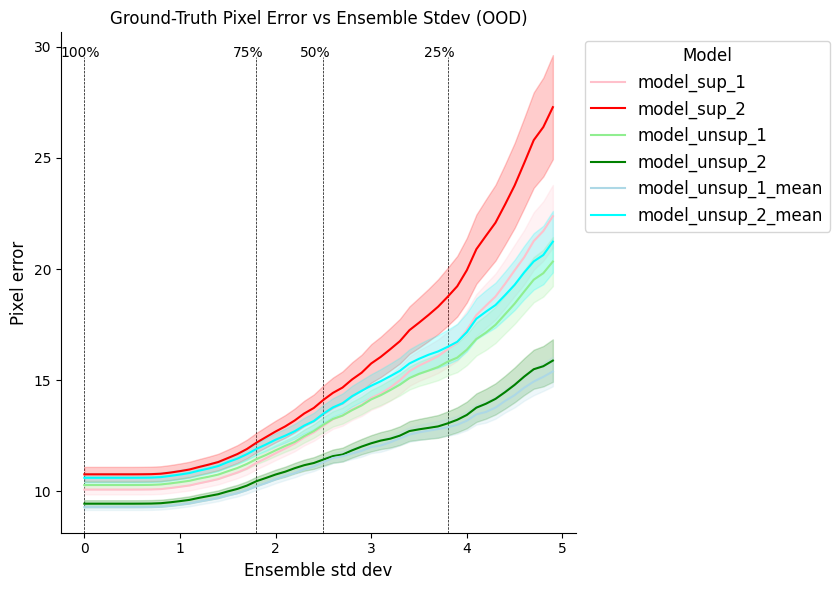

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from pseudo_labeler.evaluation import cleanaxis, compute_percentiles


def plot(
    model_names_list,
    df_line2,
    percentiles,
    percentile_values,
    legend_labels,
    color_mapping
):
    """Plots ground-truth pixel error against ensemble standard deviation.

    Args:
        std_vals: A sequence of standard deviation values for the x-axis.
        n_points_dict: A dictionary mapping model names to an array of data points.
        model_names: A list of model names.
        df_line2: A pandas DataFrame containing data for the plot.
    """
    _, ax = plt.subplots(figsize=(10, 6))  # Increase the figure size

    sns.lineplot(
        x="ens-std",
        y="mean",
        hue="model",
        hue_order=model_names,
        palette=color_mapping,
        data=df_line2,
        ax=ax,
        errorbar="se",
    )

    labels_fontsize = 12
    ax.set_title(
        "Ground-Truth Pixel Error vs Ensemble Stdev (OOD)", fontsize=labels_fontsize
    )
    ax.set_ylabel("Pixel error", fontsize=labels_fontsize)
    ax.set_xlabel("Ensemble std dev", fontsize=labels_fontsize)
    cleanaxis(ax)

    ax.legend(
        #handles=unique_handles,
        #labels=[legend_labels.get(label, label) for label in unique_labels],
        loc="upper left",
        bbox_to_anchor=(1, 1),
        fontsize=labels_fontsize,
        title="Model",
        title_fontsize=labels_fontsize,
    )

    # Add vertical line and percentile text for each percentile.
    for p, v in zip(percentiles, percentile_values):
        ax.axvline(x=v, ymax=0.95, linestyle="--", linewidth=0.5, color="k", zorder=-1)
        ax.text(
            v / np.diff(ax.get_xlim()),  # x-coordinate
            0.95,  # y coordinate
            str(round(p)) + "%",  # text
            transform=ax.transAxes,
            ha="left",
        )

    plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust layout to make room for the legend
    plt.show()


def _get_plot_df(model_names, std_vals, df_w_vars):
    n_points_dict = {m: np.nan * np.zeros_like(std_vals) for m in model_names}
    df_line2 = []
    for s, std in enumerate(std_vals):
        df_tmp_ = df_w_vars[df_w_vars["ens-std"] > std]
        for model_name in model_names:
            d = df_tmp_[df_tmp_.model == model_name]
            n_points = np.sum(~d["pixel_error"].isna())
            n_points_dict[model_name][s] = n_points
            index = []
            rng = 0
            for row, k in zip(d.index, d["keypoint"].to_numpy()):
                index.append(f"{row}" + f"_{model_name}_{s}_{k}_{rng}")
            df_line2.append(
                pd.DataFrame(
                    {
                        "ens-std": std,
                        "model": model_name,
                        "mean": d.pixel_error.to_numpy(),
                        "n_points": n_points,
                    },
                    index=index,
                )
            )
    df_line2 = pd.concat(df_line2)
    return n_points_dict, df_line2


std_vals = np.arange(0, 5, 0.1)
n_points_dict, df_line2 = _get_plot_df(model_names, std_vals, df_w_vars)

percentile_values, percentiles = compute_percentiles(
    arr=n_points_dict[model_names[0]],
    std_vals=std_vals,
    percentiles=[100, 75, 50, 25],
)

legend_labels = {
    "model_sup_1": "Supervised 1",
    "model_sup_2": "Supervised 2",
    "model_unsup_1": "Unupervised 1",
    "model_unsup_2": "Unupervised 2",
}

color_mapping = {
    "model_sup_1": "pink",
    "model_sup_2": "red",
    "model_unsup_1": "lightgreen",
    "model_unsup_2": "green",
    #'model_unsup_1_median': 'lightblue',
    #'model_unsup_2_median': 'cyan',
    'model_unsup_1_mean': 'lightblue',
    'model_unsup_2_mean': 'cyan',
}

plot(model_names, df_line2, percentiles, percentile_values, legend_labels, color_mapping)


In [6]:
df_line2

,ens-std,model,mean,n_points
labeled-data/073019_3M_pi7left_final/img004275.png_model_sup_1_0_A_head_0,0.0,model_sup_1,0.986426,4330
labeled-data/073019_3M_pi7left_final/img009945.png_model_sup_1_0_A_head_0,0.0,model_sup_1,3.098739,4330
labeled-data/073019_3M_pi7left_final/img009950.png_model_sup_1_0_A_head_0,0.0,model_sup_1,3.529641,4330
labeled-data/073019_3M_pi7left_final/img010277.png_model_sup_1_0_A_head_0,0.0,model_sup_1,9.345855,4330
labeled-data/073019_3M_pi7left_final/img027222.png_model_sup_1_0_A_head_0,0.0,model_sup_1,0.731282,4330
...,...,...,...,...
labeled-data/fish_4/img000156.png_model_unsup_2_mean_49_N_righteye_0,4.9,model_unsup_2_mean,11.806987,570
labeled-data/fish_4/img000240.png_model_unsup_2_mean_49_N_righteye_0,4.9,model_unsup_2_mean,8.034786,570
labeled-data/fish_4/img000446.png_model_unsup_2_mean_49_N_righteye_0,4.9,model_unsup_2_mean,19.315409,570
labeled-data/fish_4/img023177.png_model_unsup_2_mean_49_N_righteye_0,4.9,model_unsup_2_mean,8.497692,570
